In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
goal = np.array([5, 2, 3])
def fitness(sol):
    return np.sum(np.square(goal - sol))

In [44]:
ngen = 10000
popsize = 512

In [45]:
def run_es(ngen, popsize, learning_rate=0.01, noise_factor=0.1, bounds=(0, 1), random_state=None):
    rng = np.random.default_rng(random_state)
    guess = rng.integers(low=bounds[0], high=bounds[1], size=3)
    guesses = [guess]
    for i in range(ngen):
        if i % (ngen // 10) == 0:
            print(f"gen:{i}, fitness:{fitness(guess):.3f}")
        N = rng.normal(size=(popsize, 3))  # sample from normal distribution
        F = np.zeros(popsize)
        for j in range(popsize):
            w = guess + noise_factor * N[j]
            F[j] = fitness(w)
        # standardize fitnesses to have guassian (normal) distribution
        A = (F - np.mean(F)) / np.std(F)
        guess = guess - learning_rate / (popsize * noise_factor) * np.dot(np.transpose(N), A)
        guesses.append(guess)
    return np.array(guesses)

In [ ]:
runs = dict()
for seed in range(30):
    guesses = run_es(ngen=ngen, popsize=popsize, bounds=(-1000, 1000), random_state=seed)
    runs[seed] = guesses

gen:0, fitness:558218.000
gen:1000, fitness:419092.633
gen:2000, fitness:299815.128
gen:3000, fitness:200528.080
gen:4000, fitness:121030.230
gen:5000, fitness:61558.892
gen:6000, fitness:22022.056
gen:7000, fitness:2355.425
gen:8000, fitness:0.000
gen:9000, fitness:0.000
gen:0, fitness:260971.000
gen:1000, fitness:169023.217
gen:2000, fitness:96873.243
gen:3000, fitness:44584.008
gen:4000, fitness:12363.754
gen:5000, fitness:129.474
gen:6000, fitness:0.000
gen:7000, fitness:0.000
gen:8000, fitness:0.000
gen:9000, fitness:0.000
gen:0, fitness:1294566.000
gen:1000, fitness:1077164.322
gen:2000, fitness:879988.040
gen:3000, fitness:702528.660
gen:4000, fitness:545166.466
gen:5000, fitness:407785.077
gen:6000, fitness:290219.100
gen:7000, fitness:192663.515
gen:8000, fitness:114890.427
gen:9000, fitness:57178.941
gen:0, fitness:1488510.000
gen:1000, fitness:1254888.251
gen:2000, fitness:1041119.624
gen:3000, fitness:847499.474


In [ ]:
dfs = []
for seed, guesses in runs.items():
  df = pd.DataFrame([dict(seed=seed, gen=gen, fitness=fitness(guess)) for gen, guess in enumerate(guesses)])
  dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df

,seed,gen,fitness
0,0,0,558218.000000
1,0,1,558066.859806
2,0,2,557911.262815
3,0,3,557764.809414
4,0,4,557621.624238
...,...,...,...
300025,29,9996,71254.328544
300026,29,9997,71199.988293
300027,29,9998,71148.588712
300028,29,9999,71097.094426


In [ ]:
df.loc[df['gen']==ngen, 'fitness'].describe()

count       30.000000
mean     16160.946992
std      23210.102739
min          0.000008
25%          0.000084
50%        250.155597
75%      32344.765031
max      71044.999062
Name: fitness, dtype: float64

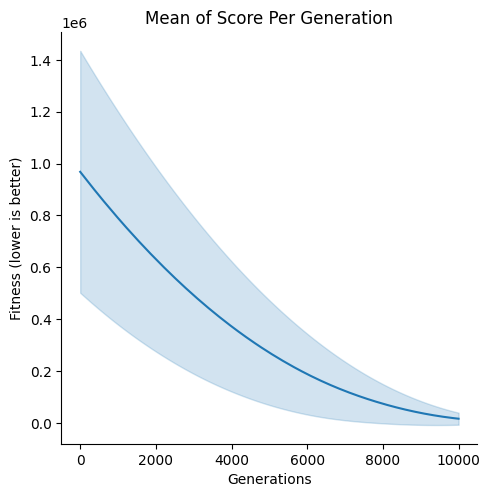

In [ ]:
g = sns.relplot(data=df, x='gen', y='fitness', kind='line', errorbar='sd', estimator='mean')
# g.set(xscale='log')
plt.title("Mean of Score Per Generation")
plt.xlabel("Generations")
plt.ylabel("Fitness (lower is better)")
plt.show()